# 1. Setup and Load Data

### 1.1. Install Dependecies & Setup

In [1]:
!pip list

Package                       Version
----------------------------- ------------
absl-py                       1.4.0
alabaster                     0.7.12
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Audio-classifier              0.4
audioread                     3.0.0
autopep8                      1.6.0
autoviz                       0.1.604
Babel                         2.11.0
backcall                      0.2.0
bcrypt                        3.2.0
beautifulsoup4                4.12.2
binaryornot                   0.4.4
black                         0.0
bleach                        4.1.0
bokeh                         2.4.3
Bottleneck                    1.3.5
brotlipy      

In [1]:
import tensorflow as ts
import os

C:\Users\aoral\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\aoral\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\aoral\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth

gpus = ts.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    ts.config.experimental.set_memory_growth(gpu, True)

In [4]:
ts.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### 1.2. Remove dodgy images

In [5]:
data_dir = 'data'

In [6]:
os.listdir(os.path.join(data_dir))

['happy', 'sad']

In [7]:
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450.jpg',
 'GettyImages-565706549-949x534.jpg',
 'GettyImages-871518740-1024x707.jpg',
 'ge

In [8]:
image_exts = ['jpeg','jpg','bmp','png',]

In [9]:
image_exts[2]

'bmp'

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

05-12-21-happy-people.jpg
07-120104-happy_people_are_not_nice_people.jpg
1-2.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
11-Habits-of-Truly-Happy-People.jpg
154006829.jpg
170404-happy-workers-feature.jpg
1902539.jpg
1902540.jpg
1902587.jpg
1920px-face-smile.svg_.png.jpg
1HEoLBLidT2u4mhJ0oiDgig.png
227-2271622_happy-people-business-team-celebrating-png.png
7-Habits-of-Happy-People-image.jpeg
7-principles-of-successful-and-happy-people.png
7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg
8cxKy5g9i.jpg
960x0.jpg
A_Sep20_14_1189155141.jpg
bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg
blog_image_20180219221810890.jpg
brady-bunch-3.jpg
e162ccda8ce0f197f8863f327add9233.jpg
fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg
friends-happy-190821-800x450.jpg
GettyImages-565706549-949x534.jpg
GettyImages-871518740-1024x707.jpg
getty_152414899_97046097045006_68075.jpg
getty_478389113_970647970450091_99776.jpg
getty_494581822_130796.jpg
ge

In [11]:
img = cv2.imread(os.path.join('data', 'happy', '154006829.jpg'))

In [12]:
img.shape # shape of pixels high, wide, 3 channels - color

(3744, 5616, 3)

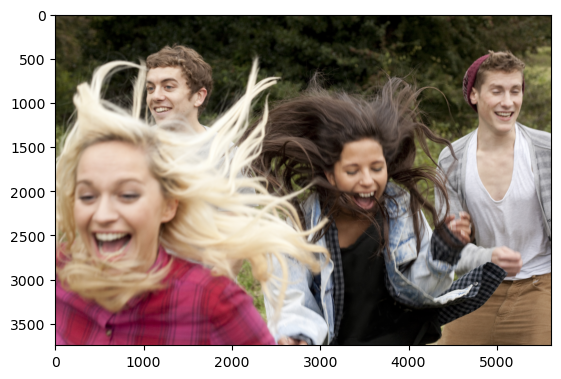

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
for image_class in os.listdir(data_dir): # looping each data director
    for image in os.listdir(os.path.join(data_dir, image_class)): # looping each image
        image_path = os.path.join(data_dir, image_class, image) # grabbing every single explicitly
        try: # try except block
            img = cv2.imread(image_path) # load image in opencv
            tip = imghdr.what(image_path) # match images one of paths
            if tip not in image_exts: # remove if invalid image
                print('Image not in extension list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

### 1.3. Load Data

In [15]:
ts.data.Dataset??

In [32]:
ts.keras.utils.image_dataset_from_directory??

In [16]:
data = ts.keras.utils.image_dataset_from_directory('data') #  building data pipeline

Found 173 files belonging to 2 classes.


In [17]:
data_iterator = data.as_numpy_iterator() 
# to convert allow to access the generator from data pipeline so data 
#underscore iterator equals data as numpy iterator

In [18]:
data_iterator

In [19]:
batch = data_iterator.next() # grabbing one batch back

In [20]:
batch

(array([[[[ 68.58435   ,  66.276855  ,  28.850708  ],
          [ 81.316284  ,  82.72815   ,  28.372192  ],
          [ 89.97058   ,  81.57019   ,  37.921265  ],
          ...,
          [ 49.670654  ,  47.057373  ,  11.668457  ],
          [ 68.440796  ,  78.62903   ,  21.36853   ],
          [ 41.880737  ,  40.12561   ,   2.072998  ]],
 
         [[ 59.725708  ,  59.86963   ,  20.12793   ],
          [129.95496   , 122.33423   ,  67.38977   ],
          [ 67.97522   ,  63.945923  ,  14.767578  ],
          ...,
          [ 66.444214  ,  81.331055  ,  23.187622  ],
          [ 62.4386    ,  77.42529   ,  17.224854  ],
          [ 34.74878   ,  34.678223  ,   3.9179688 ]],
 
         [[ 54.02661   ,  51.455444  ,  12.294067  ],
          [126.54761   , 105.696045  ,  57.044678  ],
          [ 98.0509    ,  94.9458    ,  37.575684  ],
          ...,
          [ 88.61145   , 114.07739   ,  40.479004  ],
          [ 60.08728   ,  78.858154  ,  12.471069  ],
          [ 55.895386  ,  62.49

In [21]:
len(batch) # two parts of dataset: images & labels

2

In [22]:
batch[1]

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0])

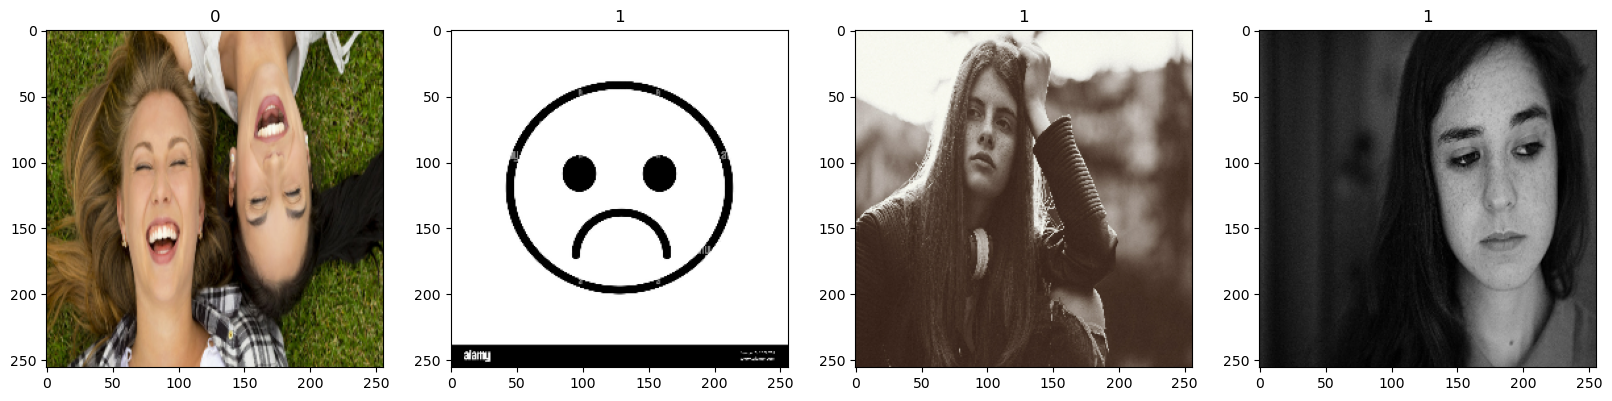

In [23]:
# label each class as number
fix, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 2. Data Preprocessing

### 2.1. Scale data

In [24]:
data = data.map(lambda x,y: (x / 255, y)) 
# function map allows to apply a particular type of transformation
# since data is being pre-processed through data pipeline that when  
# data goes pn pre-fetch data it's going to do that transformation
# x - images, y - target variable
# x is divided by 255 is scaling

### 2.2. Split Data

In [25]:
len(data) # number of batches

6

In [36]:
train_size = int(len(data)*.6) # 6 batches and each batch has 32 images
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) + 1

In [37]:
train_size # train data is used to train deep learning model

3

In [38]:
val_size # validation data is to evaluate model while training

2

In [39]:
test_size # model is used to train with test data to final evaluation state

1

In [40]:
train_size + val_size + test_size # sum should be the len size of data

6

In [41]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 3. Build Deep Learning Model

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [43]:
model = Sequential() # establish model

In [44]:
# DL architecture
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.compile('adam', loss=ts.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 4. Train

In [47]:
logdir = 'logs' # create log directory

In [48]:
# Create callback to save model at specific checkpoint
tensorboard_callback = ts.keras.callbacks.TensorBoard(log_dir=logdir)

In [63]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
3/3 [==============================] - 3s 850ms/step - loss: 0.0501 - accuracy: 0.9896 - val_loss: 0.0287 - val_accuracy: 1.0000
Epoch 2/30
3/3 [==============================] - 3s 879ms/step - loss: 0.0456 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 3/30
3/3 [==============================] - 3s 846ms/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.0338 - val_accuracy: 1.0000
Epoch 4/30
3/3 [==============================] - 3s 826ms/step - loss: 0.0426 - accuracy: 0.9792 - val_loss: 0.0385 - val_accuracy: 1.0000
Epoch 5/30
3/3 [==============================] - 3s 915ms/step - loss: 0.0430 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 6/30
3/3 [==============================] - 3s 825ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.0321 - val_accuracy: 1.0000
Epoch 7/30
3/3 [==============================] - 3s 806ms/step - loss: 0.0228 - accuracy: 0.9896 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 8/30
3/3 [====

# 5. Plot Performance

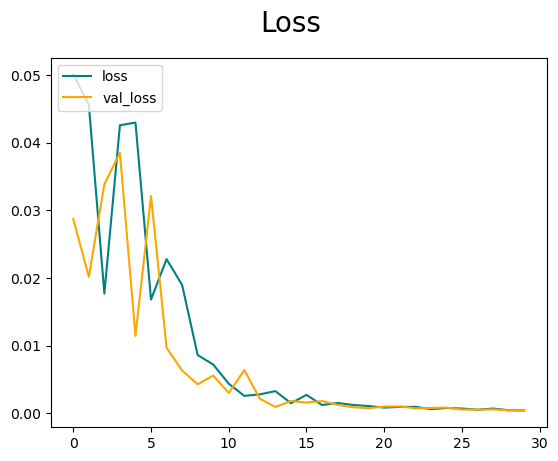

In [64]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

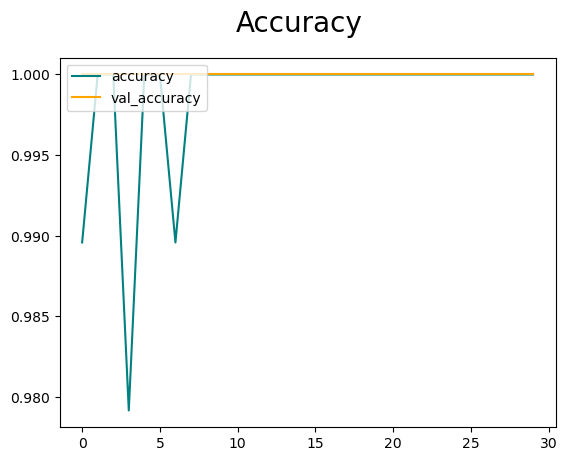

In [65]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 6. Evaluate

In [52]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [53]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [66]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 47ms/step


In [67]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.90909094, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.96153843, shape=(), dtype=float32)


In [68]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9090909361839294, Recall: 1.0, Accuracy:0.9615384340286255


# 7. Test

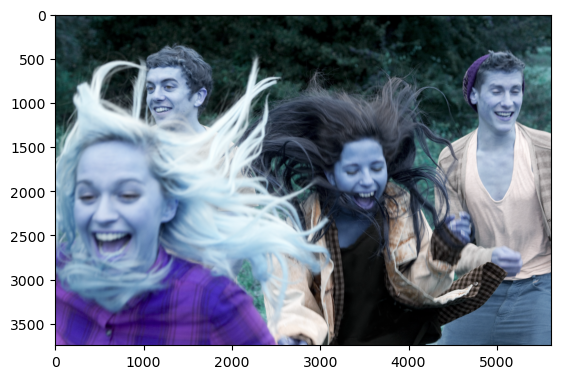

In [69]:
img = cv2.imread('data/happy/154006829.jpg')
plt.imshow(img)
plt.show()

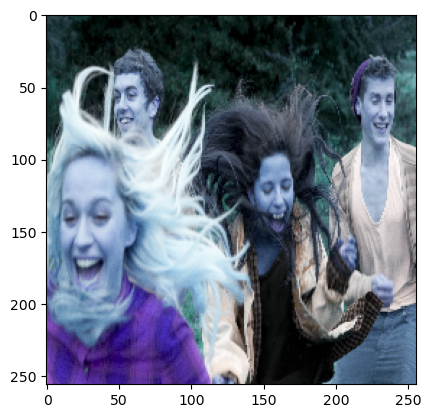

In [70]:
resize = ts.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [71]:
np.expand_dims(resize, 0)

array([[[[ 32.32617  ,  49.32617  ,  52.32617  ],
         [ 30.0625   ,  51.285156 ,  53.285156 ],
         [ 48.658203 ,  70.6582   ,  76.6582   ],
         ...,
         [ 20.164062 ,  38.033203 ,  44.753906 ],
         [ 12.8671875,  26.59375  ,  27.076172 ],
         [  1.5351562,  21.90039  ,  17.       ]],

        [[ 36.890625 ,  52.890625 ,  58.890625 ],
         [ 41.83203  ,  59.83203  ,  66.83203  ],
         [ 44.234375 ,  64.234375 ,  69.234375 ],
         ...,
         [ 20.558594 ,  38.558594 ,  45.558594 ],
         [ 26.798828 ,  39.39258  ,  42.20508  ],
         [ 21.9375   ,  37.277344 ,  34.34375  ]],

        [[ 34.501953 ,  56.501953 ,  61.970703 ],
         [ 43.57422  ,  65.75     ,  73.9375   ],
         [ 35.54492  ,  58.210938 ,  62.15039  ],
         ...,
         [ 26.642578 ,  47.98633  ,  55.29883  ],
         [ 28.90625  ,  46.79297  ,  55.34961  ],
         [ 22.626953 ,  40.814453 ,  41.876953 ]],

        ...,

        [[156.40234  ,  99.21875  , 20

In [72]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 32ms/step


In [73]:
yhat

array([[0.01997308]], dtype=float32)

In [74]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 8. Save the Model

In [77]:
from tensorflow.keras.models import load_model

In [78]:
model.save(os.path.join('models','imageclassifier.h5'))

In [79]:
new_model = load_model('models/imageclassifier.h5')

In [80]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 110ms/step


In [81]:
if yhat_new > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
